# Correlation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

import pinkfish as pf

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

In [3]:
symbols = ['SPY', 'GLD', 'BOND', 'EEM', 'IYR', 
           'JNK', 'LQD', 'NLY',  'PFF', 'PGX',
           'SLY', 'TIP', 'TLT',  'BSV', 'VNQ']
#symbols = ['GLD', 'GDX']

#symbols = ['SPY', '^GSPC']


#symbols = ['LQD', 'TLT']
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

In [4]:
# fetch timeseries
portfolio = pf.Portfolio()
ts = portfolio.fetch_timeseries(symbols, start, end, fields=['close'])

In [5]:
ts, start = portfolio.finalize_timeseries(ts, start)

,SPY,GLD,BOND,EEM,IYR,JNK,LQD,NLY,PFF,PGX,SLY,TIP,TLT,BSV,VNQ
SPY,1.00,0.11,0.27,0.88,0.88,0.84,0.33,0.60,0.71,0.58,0.89,-0.07,-0.48,0.01,0.89
GLD,0.11,1.00,0.37,0.13,0.15,0.16,0.34,0.07,0.14,0.13,0.05,0.32,0.27,0.37,0.14
BOND,0.27,0.37,1.00,0.31,0.36,0.36,0.76,0.38,0.56,0.56,0.30,0.53,0.47,0.57,0.35
EEM,0.88,0.13,0.31,1.00,0.78,0.76,0.32,0.55,0.73,0.64,0.80,0.02,-0.42,0.13,0.79
IYR,0.88,0.15,0.36,0.78,1.00,0.86,0.40,0.69,0.77,0.66,0.86,0.03,-0.36,0.15,1.00
JNK,0.84,0.16,0.36,0.76,0.86,1.00,0.52,0.63,0.72,0.61,0.79,0.02,-0.35,0.22,0.85
LQD,0.33,0.34,0.76,0.32,0.40,0.52,1.00,0.40,0.42,0.39,0.36,0.47,0.33,0.70,0.39
NLY,0.60,0.07,0.38,0.55,0.69,0.63,0.40,1.00,0.68,0.63,0.67,0.06,-0.13,0.22,0.67
PFF,0.71,0.14,0.56,0.73,0.77,0.72,0.42,0.68,1.00,0.97,0.73,0.22,-0.07,0.22,0.76
PGX,0.58,0.13,0.56,0.64,0.66,0.61,0.39,0.63,0.97,1.00,0.64,0.26,0.04,0.23,0.65


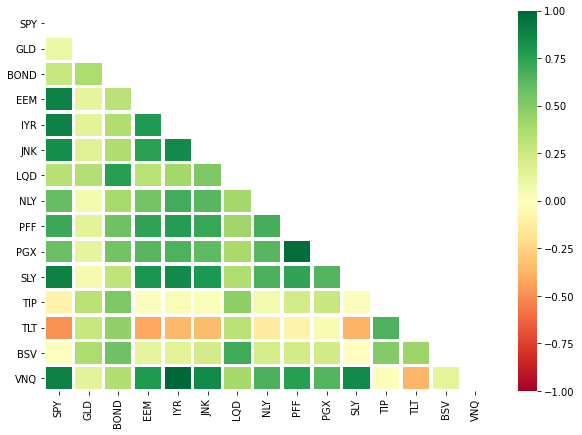

In [6]:
corr_df = portfolio.correlation_map(ts, method='log', days=pf.TRADING_DAYS_PER_YEAR)
corr_df